In [1]:
from preprocess.preprocess import *
import os

In [2]:
# images size
img_width = 600
img_height = 100

# default paths
WORKING_DIR = os.path.join('/home', 'mts')
ann_path = os.path.join(WORKING_DIR, 'HKR_Dataset_Words_Public', 'ann')
img_path = os.path.join(WORKING_DIR, 'HKR_Dataset_Words_Public', 'img')
metadata = os.path.join(WORKING_DIR, 'metadata', 'metadata.tsv')

In [3]:
# collect metadata
meta_collect(ann_path, metadata)

# get preprocessed metadata dataframe
df = PreprocessFrame(metadata=metadata,
                     img_height=img_height, img_width=img_width)
print(df.shape)

# Make augments file (if they exists: comment or delete line)
aug_df = None
aug_df = make_augments(df=df, img_path=img_path, WORKING_DIR=WORKING_DIR,
                        img_height=img_height, img_width=img_width)

# get augments metadata dataframe from original dataframe if not starting make_augments
if not isinstance(aug_df, pd.DataFrame):
    aug_df = df.copy()
    aug_df.index = aug_df.index.to_series().apply(lambda x: os.path.join('aug_1', 'aug_' + x))

train, test, val = list(Dataset(df, aug_df=aug_df,
                                test_size=0.1,
                                val_size=0.05,
                                img_path=img_path,
                                img_height=img_height,
                                img_width=img_width,
                                WORKING_DIR=WORKING_DIR,
                                shuffle=True,
                                random_state=12))
train

  0%|          | 0/97 [00:00<?, ?it/s]

(48419, 4)


100%|██████████| 97/97 [19:28<00:00, 12.04s/it]


<PrefetchDataset shapes: {image: (None, 600, 100, 1), label: (None, None)}, types: {image: tf.float32, label: tf.int64}>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
constant_values = ((255, 255),) * 3
image = imageio.imread(os.path.join(img_path, '0_0_0.jpg'))
height = (img_height - image.shape[0]) // 2
width = (img_width - image.shape[1]) // 2
padding = ((height, height), (width, width), (0, 0))

print(image.shape)

(64, 495, 3)


In [7]:
from numpy import pad

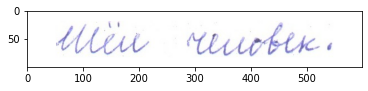

In [9]:
constant_values = ((255, 255),) * 3
plt.imshow(pad(image, padding, constant_values=constant_values))

In [10]:
ls

EDA.html*                  README.md*   metadata/      preprocess/
HKR_Dataset_Words_Public/  arxivs/      model/         requirements.txt*
LICENSE*                   dockerfile*  mts-env.yaml*  run.ipynb*


In [11]:
r'''
params:

callbacks: list of callback names [checkpoint, csv_log, tb_log, early_stopping]
metrics: list of metrics name [cer, wer, accuracy, ctc_loss]

checkpoint_path
csv_log_path
tb_log_path
  tb_update_freq: int

early_stopping
    early_stopping_patience: int

input_img_shape: array(width, height, 1)

vocab_len: len of vocab with blank
restore_weights: bool
max_label_len
chars_path
blank - '#'
'''
vocab_len = -1 #check from dataset
max_label_len = -1
chars_path = os.path.join(os.path.split(metadata)[0], 'symbols.txt') # have to save all chars like:
r'''
a
b
c
 
#
'''

params = {
    'callbacks': ['checkpoint', 'csv_log', 'tb_log', 'early_stopping'],
    'metrics': ['cer', 'wer', 'accuracy'],
    'checkpoint_path': 'checkpoints/training_0/cp.ckpt',
    'csv_log_path': 'logs/csv_logs/log_0.csv',
    'tb_log_path': 'logs/tb_logs/log0',
    'tb_update_freq': 200,
    'early_stopping_patience': 10,
    'input_img_shape': (600, 100, 1),
    'vocab_len': -1,
    'max_label_len': -1,
    'chars_path': 'path.txt',
    'blank': '#'
}

In [12]:
from model import Model